In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 18,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink","tab:cyan"]

In [4]:
df_jpeg_map = pd.read_csv("../measurements/jpeg_per_frame/map.csv")
df_jpeg_cha = pd.read_csv("../measurements/jpeg_per_frame/characteristic.csv")

df_decom_map = pd.read_csv("../measurements/decomposition_per_frame/map.csv")
df_decom_cha = pd.read_csv("../measurements/decomposition_per_frame/characteristic.csv")

df_reg_map = pd.read_csv("../measurements/regression_per_frame/map.csv")
df_reg_cha = pd.read_csv("../measurements/regression_per_frame/characteristic.csv")

In [5]:
df_jpeg_cha["map"] = df_jpeg_map["map"]
df_jpeg_cha["sen"] = df_jpeg_map["sensitivity"]

df_decom_cha["map"] = df_decom_map["map"]
df_decom_cha["sen"] = df_decom_map["sensitivity"]

df_reg_cha["map"] = df_reg_map["map"]
df_reg_cha["sen"] = df_reg_map["sensitivity"]

In [6]:
df_group = df_jpeg_cha.groupby("pruning_thresh")
datasize_jpeg = []
maps_jpeg = []
sens_jpeg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_jpeg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        maps_jpeg.append(conf_g["map"].to_numpy().mean()*100)
        sens_jpeg.append(conf_g["sen"].to_numpy().mean()*100)

df_group = df_decom_cha.groupby("pruning_thresh")
datasize_decom = []
maps_decom = []
sens_decom = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_decom.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        maps_decom.append(conf_g["map"].to_numpy().mean()*100)
        sens_decom.append(conf_g["sen"].to_numpy().mean()*100)

df_group = df_reg_cha.groupby("pruning_thresh")

datasize_reg = []
maps_reg = []
sens_reg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_reg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        maps_reg.append(conf_g["map"].to_numpy().mean()*100)
        sens_reg.append(conf_g["sen"].to_numpy().mean()*100)

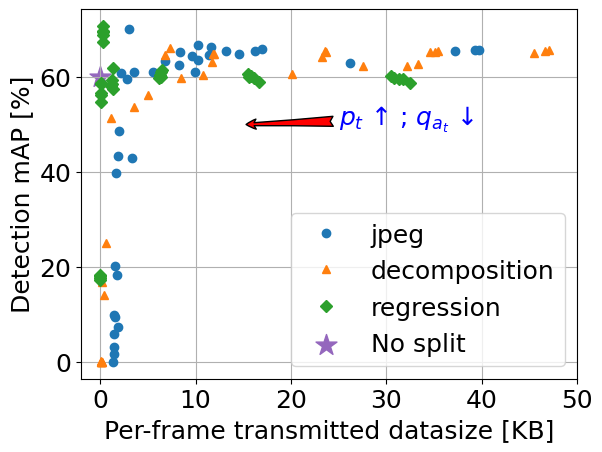

In [42]:
plt.figure()
plt.plot(datasize_jpeg, maps_jpeg,"o",color=colors[0], label="jpeg")
plt.plot(datasize_decom, maps_decom,"^",color=colors[1], label="decomposition")
plt.plot(datasize_reg, maps_reg,"D",color=colors[2], label="regression")
no_split_map_30 = 0.6
plt.scatter(0,no_split_map_30*100,250,marker="*",color=colors[3],label="No split")

# plt.annotate(
#     '($p_t, q_{a_t}$)',
#     xy=,
#     xytext=,
#     arrowprops=dict(facecolor='red', arrowstyle='->'),
#     fontsize=12,
#     color='blue',
#     weight='bold'
# )

plt.annotate(
    '$p_t$ ↑ ; $q_{a_t}$ ↓', 
    xy=(15, 50), 
    xytext=(25, 50), 
    arrowprops=dict(facecolor='red', arrowstyle='fancy'),
    color='blue',
)

plt.legend(loc="lower right")
plt.xlim([-2,50])
plt.grid()
plt.xlabel("Per-frame transmitted datasize [KB]")
plt.ylabel("Detection mAP [%]")
plt.savefig("../figures/map_vs_datasize.pdf", bbox_inches='tight')

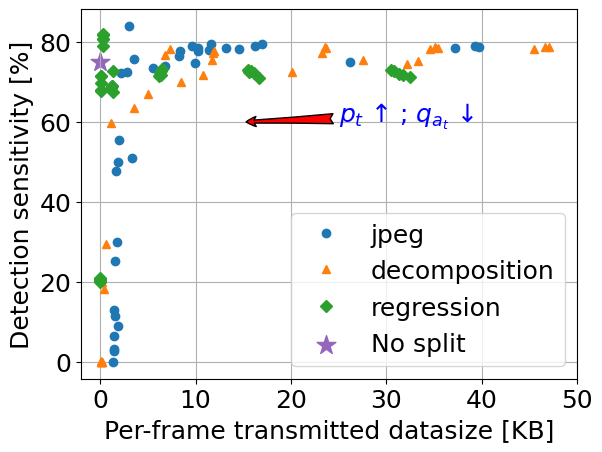

In [43]:
plt.figure()
plt.plot(datasize_jpeg, sens_jpeg,"o",color=colors[0], label="jpeg")
plt.plot(datasize_decom, sens_decom,"^",color=colors[1], label="decomposition")
plt.plot(datasize_reg, sens_reg,"D",color=colors[2], label="regression")
no_split_map_30 = 0.75 # Tobe double check
plt.scatter(0,no_split_map_30*100,200,marker="*",color=colors[3],label="No split")

plt.annotate(
    '$p_t$ ↑ ; $q_{a_t}$ ↓', 
    xy=(15, 60), 
    xytext=(25, 60), 
    arrowprops=dict(facecolor='red', arrowstyle='fancy'),
    color='blue',
)

plt.legend(loc="lower right")
plt.xlim([-2, 50])
plt.grid()
plt.xlabel("Per-frame transmitted datasize [KB]")
plt.ylabel("Detection sensitivity [%]")
plt.savefig("../figures/sens_vs_datasize.pdf", bbox_inches='tight')